# KIVA CROWDFUNDING


Kiva.org is an online crowdfunding platform to extend financial services to poor and financially excluded people around the world. Kiva lenders have provided over $1 billion dollars in loans to over 2 million people. In order to set investment priorities, help inform lenders, and understand their target communities, knowing the level of poverty of each borrower is critical. However, this requires inference based on a limited set of information for each borrower. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
#reading data with pandas
#main dataset
loan = pd.read_csv('Data/kiva_loans.csv')
#other datasets i.e. region, loan themes(id and by region)
region = pd.read_csv('Data/kiva_mpi_region_locations.csv')
ids = pd.read_csv('Data/loan_theme_ids.csv')
themes = pd.read_csv('Data/loan_themes_by_region.csv')
loan.tail()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
671200,1340323,0.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",PY,Paraguay,Concepción,USD,58.0,2017-07-25 16:55:34+00:00,2017-07-25 07:00:00+00:00,NaN,13.0,0,NaN,female,monthly,2017-07-25
671201,1340316,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,138.0,2017-07-25 06:14:08+00:00,2017-07-24 07:00:00+00:00,2017-07-26 02:09:43+00:00,13.0,1,NaN,female,monthly,2017-07-25
671202,1340334,0.0,25.0,Games,Entertainment,NaN,KE,Kenya,NaN,KES,138.0,2017-07-26 00:02:07+00:00,2017-07-25 07:00:00+00:00,NaN,13.0,0,NaN,NaN,monthly,2017-07-26
671203,1340338,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,138.0,2017-07-26 06:12:55+00:00,2017-07-25 07:00:00+00:00,NaN,13.0,0,NaN,female,monthly,2017-07-26
671204,1340339,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,138.0,2017-07-26 06:31:46+00:00,2017-07-25 07:00:00+00:00,NaN,13.0,0,NaN,female,monthly,2017-07-26


In [2]:
region.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [3]:
ids.head()

,id,Loan Theme ID,Loan Theme Type,Partner ID
0,638631,a1050000000skGl,General,151.0
1,640322,a1050000000skGl,General,151.0
2,641006,a1050000002X1ij,Higher Education,160.0
3,641019,a1050000002X1ij,Higher Education,160.0
4,641594,a1050000002VbsW,Subsistence Agriculture,336.0


In [4]:
themes.head()

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,...,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,...,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
2,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,NaN,KHM,...,9150,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
3,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,604950,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
4,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000002X1Uu,Sanitation,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,275,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0


In [5]:
#an overview of the data
loan.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


In [6]:
#checking for missing values
print(loan.info(), region.info(), ids.info(), themes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
id                    671205 non-null int64
funded_amount         671205 non-null float64
loan_amount           671205 non-null float64
activity              671205 non-null object
sector                671205 non-null object
use                   666973 non-null object
country_code          671197 non-null object
country               671205 non-null object
region                614405 non-null object
currency              671205 non-null object
partner_id            657698 non-null float64
posted_time           671205 non-null object
disbursed_time        668809 non-null object
funded_time           622874 non-null object
term_in_months        671205 non-null float64
lender_count          671205 non-null int64
tags                  499789 non-null object
borrower_genders      666984 non-null object
repayment_interval    671205 non-null object
date                  671205 non

In [7]:
#merge region and main data set
loan_merge = pd.merge(loan, region).dropna()
loan_merge

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,borrower_genders,repayment_interval,date,LocationName,ISO,world_region,MPI,geo,lat,lon
0,653359,600.0,600.0,Machinery Rental,Services,to invest in working capital and to maintain g...,NI,Nicaragua,Leon,NIO,...,female,monthly,2014-01-02,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569
1,653373,1000.0,1000.0,Grocery Store,Food,to invest in working capital and to provide hi...,NI,Nicaragua,Leon,NIO,...,male,monthly,2014-01-02,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569
2,653364,250.0,250.0,Fuel/Firewood,Retail,to buy firewood to offer to her customers,NI,Nicaragua,Leon,NIO,...,female,monthly,2014-01-02,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569
4,653396,800.0,800.0,Clothing Sales,Clothing,to invest in working capital to stock their bu...,NI,Nicaragua,Leon,NIO,...,"female, female, female",monthly,2014-01-02,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569
5,653402,800.0,800.0,Grocery Store,Food,to invest in working capital and to supply her...,NI,Nicaragua,Leon,NIO,...,female,monthly,2014-01-02,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569
6,653398,400.0,400.0,Clothing Sales,Clothing,To invest in working capital and stock her clo...,NI,Nicaragua,Leon,NIO,...,female,monthly,2014-01-02,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569
7,653400,1925.0,1925.0,Grocery Store,Food,to stock her store.,NI,Nicaragua,Leon,NIO,...,"female, female, female, female, female, female...",irregular,2014-01-02,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569
8,653395,250.0,250.0,Clothing Sales,Clothing,to invest in working capital and to stock her ...,NI,Nicaragua,Leon,NIO,...,female,monthly,2014-01-02,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569
9,653390,800.0,800.0,Grocery Store,Food,to invest in working capital and stock up her ...,NI,Nicaragua,Leon,NIO,...,female,monthly,2014-01-02,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569
10,653377,600.0,600.0,Cosmetics Sales,Retail,to invest in working capital and stock up on c...,NI,Nicaragua,Leon,NIO,...,female,monthly,2014-01-02,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569


In [9]:
loan_merge.T

,0,1,2,4,5,6,7,8,9,10,...,52185,52186,52187,52188,52189,52191,52192,52193,52195,52196
id,653359,653373,653364,653396,653402,653398,653400,653395,653390,653377,...,1297103,1296923,1304580,1313379,1315632,1207215,1207220,1207690,1300428,1323945
funded_amount,600,1000,250,800,800,400,1925,250,800,600,...,425,850,850,825,1300,500,2075,1925,5050,10000
loan_amount,600,1000,250,800,800,400,1925,250,800,600,...,425,850,850,825,1300,500,2075,1925,5050,10000
activity,Machinery Rental,Grocery Store,Fuel/Firewood,Clothing Sales,Grocery Store,Clothing Sales,Grocery Store,Clothing Sales,Grocery Store,Cosmetics Sales,...,Mobile Transactions,Mobile Transactions,Mobile Transactions,Mobile Transactions,Cereals,Farm Supplies,Farm Supplies,Farm Supplies,Higher education costs,Weaving
sector,Services,Food,Retail,Clothing,Food,Clothing,Food,Clothing,Food,Retail,...,Services,Services,Services,Services,Food,Agriculture,Agriculture,Agriculture,Education,Arts
use,to invest in working capital and to maintain g...,to invest in working capital and to provide hi...,to buy firewood to offer to her customers,to invest in working capital to stock their bu...,to invest in working capital and to supply her...,To invest in working capital and stock her clo...,to stock her store.,to invest in working capital and to stock her ...,to invest in working capital and stock up her ...,to invest in working capital and stock up on c...,...,to pay for a kiosk for his start-up business a...,to generate capital for her start-up business ...,to attain a kiosk for her start-up business as...,to attain a kisok for her start-up business as...,to buy more rice and beans,to pay for high quality seeds and fertilisers ...,to buy high-quality seeds to plant and to sell.,"to purchase seeds, pesticides and fertilizers ...",to continue and finish her education in indust...,to develop a new product which will help creat...
country_code,NI,NI,NI,NI,NI,NI,NI,NI,NI,NI,...,MW,MW,MW,MW,MW,MZ,MZ,MZ,PE,BT
country,Nicaragua,Nicaragua,Nicaragua,Nicaragua,Nicaragua,Nicaragua,Nicaragua,Nicaragua,Nicaragua,Nicaragua,...,Malawi,Malawi,Malawi,Malawi,Malawi,Mozambique,Mozambique,Mozambique,Peru,Bhutan
region,Leon,Leon,Leon,Leon,Leon,Leon,Leon,Leon,Leon,Leon,...,Ntcheu,Ntcheu,Ntcheu,Ntcheu,Ntcheu,Manica,Manica,Manica,Tacna,Thimphu
currency,NIO,NIO,NIO,NIO,NIO,NIO,NIO,NIO,NIO,NIO,...,MWK,MWK,MWK,MWK,MWK,MZN,MZN,MZN,USD,USD


In [13]:
#Cleaning gender column

loan_merge['gender'] = loan_merge['borrower_genders'].apply(lambda x: x.split(',')[0])
loan_merge.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,repayment_interval,date,LocationName,ISO,world_region,MPI,geo,lat,lon,gender
0,653359,600.0,600.0,Machinery Rental,Services,to invest in working capital and to maintain g...,NI,Nicaragua,Leon,NIO,...,monthly,2014-01-02,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569,female
1,653373,1000.0,1000.0,Grocery Store,Food,to invest in working capital and to provide hi...,NI,Nicaragua,Leon,NIO,...,monthly,2014-01-02,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569,male
2,653364,250.0,250.0,Fuel/Firewood,Retail,to buy firewood to offer to her customers,NI,Nicaragua,Leon,NIO,...,monthly,2014-01-02,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569,female
4,653396,800.0,800.0,Clothing Sales,Clothing,to invest in working capital to stock their bu...,NI,Nicaragua,Leon,NIO,...,monthly,2014-01-02,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569,female
5,653402,800.0,800.0,Grocery Store,Food,to invest in working capital and to supply her...,NI,Nicaragua,Leon,NIO,...,monthly,2014-01-02,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569,female


In [15]:
#gender

loan_merge['gender'].value_counts(normalize = True)

female    0.596167
male      0.403833
Name: gender, dtype: float64

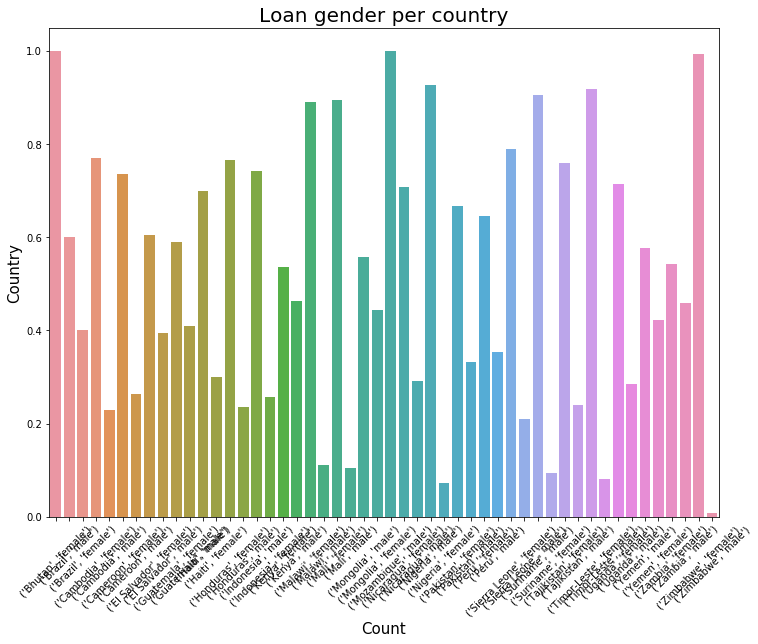

In [35]:
#gender by country
import matplotlib.pyplot as plt
loan_new = loan_merge.groupby('country')['gender'].value_counts(normalize = True)
fig = plt.figure(figsize = (12,9))
bar_plot = sns.barplot(x = loan_new.index, y=loan_new.values)

# Set labels and title
plt.title("Loan gender per country", fontsize=20)
plt.ylabel("Country", fontsize=15)
plt.xlabel("Count", fontsize=15)

labels = bar_plot.get_xticklabels()
bar_plot.set_xticklabels(labels, rotation=45)

# show the plot
plt.show()

In [18]:
#gender by world region

loan_merge.groupby('world_region')['gender'].value_counts(normalize = True)

world_region                 gender
Arab States                  male      0.576699
                             female    0.423301
East Asia and the Pacific    female    0.758677
                             male      0.241323
Europe and Central Asia      female    0.759897
                             male      0.240103
Latin America and Caribbean  female    0.650684
                             male      0.349316
South Asia                   female    0.687500
                             male      0.312500
Sub-Saharan Africa           male      0.658303
                             female    0.341697
Name: gender, dtype: float64

In [19]:
#gender by the highest lend count

loan_merge.groupby('gender')['lender_count'].count()

gender
female    20780
male      14076
Name: lender_count, dtype: int64